* read the dataset
* graph the scatter plot
* Eda
    * info
    * description
    * missing values
* Feature engineering- divide the dataset into dependent feature and independent feature  
* Divede the dataset into train and test dataset

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'wieght')

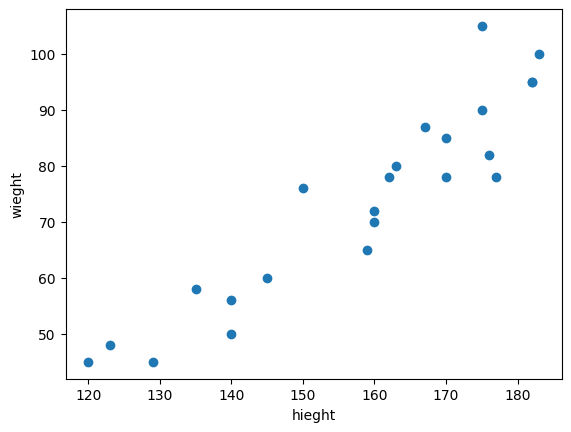

In [23]:
plt.scatter(df['Height'],df['Weight'])
plt.xlabel("hieght")
plt.ylabel("wieght")


In [24]:
# EDA 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [25]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [26]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [27]:
# Feature Engineering

x = df[['Height']] #independent variable
y = df['Weight'] # dependent varible


In [28]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.20,random_state=43)

In [29]:
x_train.shape,x_test.shape

((18, 1), (5, 1))

#  Stander Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
x_train = scaler.fit_transform(x_train)

In [32]:
x_test= scaler.transform(x_test)

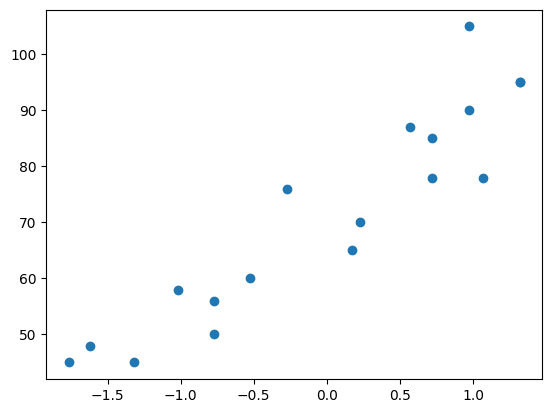

In [33]:
plt.scatter(x_train,y_train)

# Model Traning

In [34]:
from sklearn.linear_model import LinearRegression
regrassor = LinearRegression()

In [35]:
## training the train data

regrassor.fit(x_train,y_train)

LinearRegression()

In [36]:
regrassor.intercept_

71.44444444444444

In [37]:
regrassor.coef_

array([17.11128743])

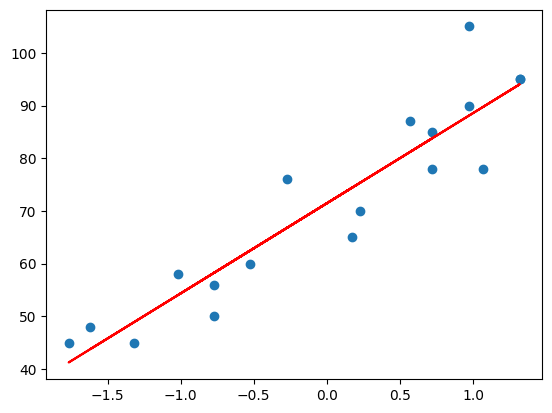

In [38]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regrassor.predict(x_train),color = 'r')

# **Prediction of Train data**
    1. predicted hieght output  = intercept + coef_(wieght)
    2. y_pred_data = 74.27 + 16.71(x_train)
# **Prediction of test data**
    1. predict hieght output= intercept + coef_(wieghts)
    2. y_pred_test = 74.27 + 16.71(X_train)

In [39]:
## pediction for test data 
y_pred_test = regrassor.predict(x_test)
y_pred_test

array([77.82911272, 88.89587105, 76.97782361, 94.85489477, 75.27524541])

In [40]:
y_test

6      80
10     82
5      78
13    100
22     72
Name: Weight, dtype: int64

# **Performance matrics  MSE MAE RMSE**

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

18.10199480446242
3.7018570719223844
4.254643910418641


In [ ]:
## acuracy of the model R squered and adjusted r squered
